In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data=pd.read_csv("Crop_recommendation.csv")

In [60]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# 1) Descirbe the data set

In [61]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [62]:
data.shape


(2200, 8)

In [78]:
#checking for unique values
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))

column Name :  N
No. of unique values : 137 

column Name :  P
No. of unique values : 117 

column Name :  K
No. of unique values : 73 

column Name :  TEMPERATURE
No. of unique values : 2200 

column Name :  HUMIDITY
No. of unique values : 2200 

column Name :  PH
No. of unique values : 2200 

column Name :  RAINFALL
No. of unique values : 2200 

column Name :  LABEL
No. of unique values : 22 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


# 2) Eliminate Null Values

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [64]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

We can see that there are no missing values in the data set 

# 2) Outlier Detection

# 2.a)Outlier in the Nitrogen feature.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Nitogen')

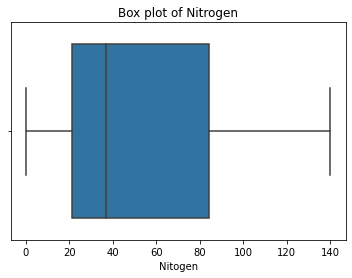

In [79]:
sns.boxplot(data["N"])
plt.title("Box plot of Nitrogen")
plt.xlabel("Nitogen")

We can see that no outliers are present in the nitrogen data set 

# 2.b) Outliers of Temperature data

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'temperature')

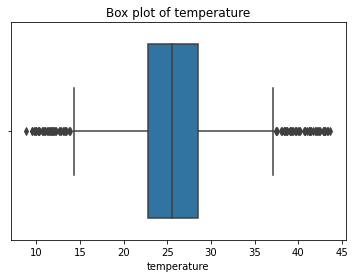

In [116]:
sns.boxplot(data["temperature"])
plt.title("Box plot of temperature")
plt.xlabel("temperature")

In [117]:
Q1=data.temperature.quantile(.25)
Q3=data.temperature.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print("Upper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)

IQR is  5.792279300000001
Upper limit of normal value is 37.2500728825
Lower limit of normal value is 14.080955682499999


In [118]:
df2= data[(data.temperature>Lower_Limit)&(data.temperature<Upper_limit)]
print("Shape of original data is",data.shape)
print("Shape of outlier eliminated data is",df2.shape)

Shape of original data is (2200, 8)
Shape of outlier eliminated data is (2114, 8)


We can see in dataframe df2 outlier of temperature is eliminated in form the original dataset

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'temperature')

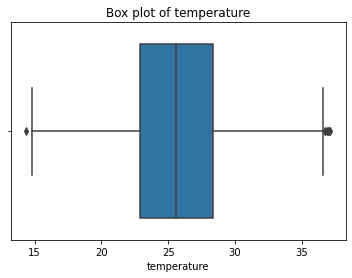

In [119]:
# Outliers of Temperature data
sns.boxplot(df2["temperature"])
plt.title("Box plot of temperature")
plt.xlabel("temperature")

In [120]:
Q1=df2.temperature.quantile(.25)
Q3=df2.temperature.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print("Upper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= data[(data.temperature>Lower_Limit)&(data.temperature<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)



IQR is  5.472669917499999
Upper limit of normal value is 36.572532321249994
Lower limit of normal value is 14.68185265125
Shape of outlier eliminated data is (2107, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'temperature')

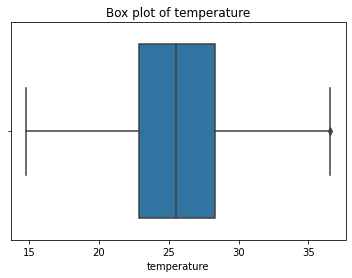

In [121]:
sns.boxplot(df2["temperature"])
plt.title("Box plot of temperature")
plt.xlabel("temperature")

We can see that all outliers in the temperature column are eliminated

# 2.c) Outliers in Phosphorous column

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, ' Phosphorous')

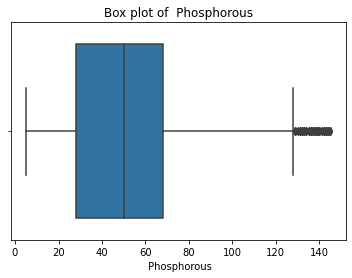

In [122]:
sns.boxplot(df2["P"])
plt.title("Box plot of  Phosphorous")
plt.xlabel(" Phosphorous")

In [123]:
Q1=df2.P.quantile(.25)
Q3=df2.P.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.P>Lower_Limit)&(df2.P<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  40.0
 
Upper limit of normal value is 128.0
Lower limit of normal value is -32.0
Shape of outlier eliminated data is (1985, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Phosphorous')

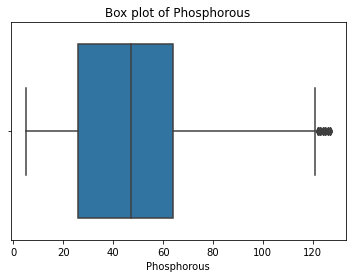

In [124]:
sns.boxplot(df2["P"])
plt.title("Box plot of Phosphorous")
plt.xlabel("Phosphorous")

In [125]:
Q1=df2.P.quantile(.25)
Q3=df2.P.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.P>Lower_Limit)&(df2.P<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  38.0
 
Upper limit of normal value is 121.0
Lower limit of normal value is -31.0
Shape of outlier eliminated data is (1950, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Phosphorous')

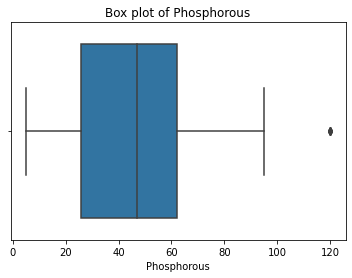

In [126]:
sns.boxplot(df2["P"])
plt.title("Box plot of Phosphorous")
plt.xlabel("Phosphorous")

All the outliers in the column Phosphorous is eliminated.

# 2.d) Outliers in Potassium column

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, ' Potassium')

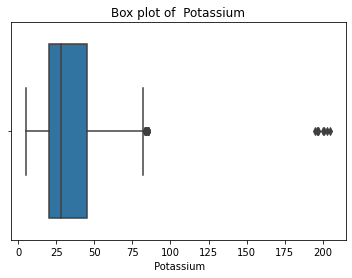

In [127]:
sns.boxplot(df2["K"])
plt.title("Box plot of  Potassium")
plt.xlabel(" Potassium")

In [128]:
Q1=df2.K.quantile(.25)
Q3=df2.K.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.P>Lower_Limit)&(df2.P<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  25.0
 
Upper limit of normal value is 82.5
Lower limit of normal value is -17.5
Shape of outlier eliminated data is (1895, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, ' Potassium')

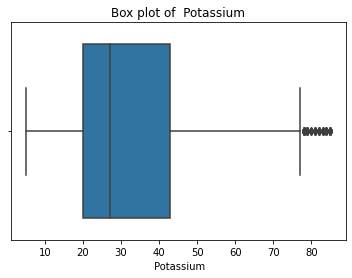

In [129]:
sns.boxplot(df2["K"])
plt.title("Box plot of  Potassium")
plt.xlabel(" Potassium")

In [130]:
Q1=df2.K.quantile(.25)
Q3=df2.K.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.P>Lower_Limit)&(df2.P<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  23.0
 
Upper limit of normal value is 77.5
Lower limit of normal value is -14.5
Shape of outlier eliminated data is (1818, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, ' Potassium')

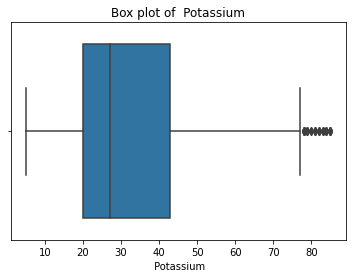

In [131]:
sns.boxplot(df2["K"])
plt.title("Box plot of  Potassium")
plt.xlabel(" Potassium")

In [133]:
# This is used to find the outliers in the data
outliers=[]
for x in df2["K"]:
    if ((x>Upper_limit) or (x<Lower_Limit)):
        outliers.append(x)
print("outlier data are \n",outliers)

# to find the index of the outlier
ind1= df2["K"]>Upper_limit
print("index of outliers are \n",df2.loc[ind1].index)

outlier data are 
 [84, 85, 85, 81, 84, 84, 81, 79, 79, 81, 85, 84, 84, 83, 83, 78, 80, 84, 85, 81, 82, 83, 81, 78, 79, 81, 81, 78, 79, 83, 84, 78, 85, 78, 78, 78, 85, 80, 85, 85, 82, 79, 78, 82, 85, 80, 83, 79, 79, 79, 85, 82, 84, 80, 83, 78, 81, 82, 85, 78, 82, 78, 78, 83, 82]
index of outliers are 
 Int64Index([201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 215, 217,
            223, 224, 225, 226, 227, 228, 229, 230, 232, 235, 237, 241, 243,
            244, 245, 246, 247, 248, 249, 251, 252, 254, 255, 256, 258, 260,
            262, 263, 264, 266, 267, 268, 269, 270, 271, 272, 273, 276, 277,
            278, 280, 282, 284, 286, 287, 289, 290, 294, 295, 296, 297, 299],
           dtype='int64')


In [134]:

df2.drop([201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 215, 217,
            223, 224, 225, 226, 227, 228, 229, 230, 232, 235, 237, 241, 243,
            244, 245, 246, 247, 248, 249, 251, 252, 254, 255, 256, 258, 260,
            262, 263, 264, 266, 267, 268, 269, 270, 271, 272, 273, 276, 277,
            278, 280, 282, 284, 286, 287, 289, 290, 294, 295, 296, 297, 299], inplace= True)

In [98]:
df2.shape

(1753, 8)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, ' Potassium')

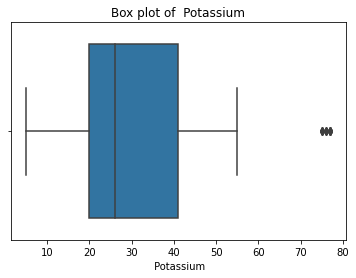

In [135]:
sns.boxplot(df2["K"])
plt.title("Box plot of  Potassium")
plt.xlabel(" Potassium")

outlier data are 
 []
index of outliers are 
 Int64Index([], dtype='int64')


In [137]:
Q1=df2.K.quantile(.25)
Q3=df2.K.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.K>Lower_Limit)&(df2.K<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  21.0
 
Upper limit of normal value is 72.5
Lower limit of normal value is -11.5
Shape of outlier eliminated data is (1730, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, ' Potassium')

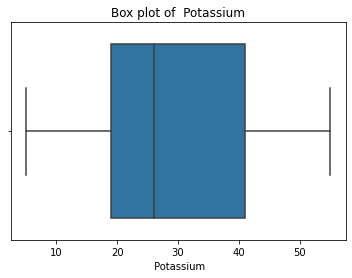

In [138]:
sns.boxplot(df2["K"])
plt.title("Box plot of  Potassium")
plt.xlabel(" Potassium")

In [102]:
# This is used to find the outliers in the data
outliers=[]
for x in df2["K"]:
    if ((x>Upper_limit) or (x<Lower_Limit)):
        outliers.append(x)
print("outlier data are \n",outliers)

# to find the index of the outlier
ind1= df2["K"]>Upper_limit
print("index of outliers are \n",df2.loc[ind1].index)

outlier data are 
 [77, 77, 75, 77, 76, 77, 77, 77, 77, 76, 76, 75, 75, 76, 77, 76, 75]
index of outliers are 
 Int64Index([200, 204, 208, 214, 216, 219, 221, 236, 239, 240, 257, 261, 274,
            288, 291, 293, 298],
           dtype='int64')


In [103]:

# to drop these data
df2.drop([200, 204, 208, 214, 216, 219, 221, 236, 239, 240, 257, 261, 274,
            288, 291, 293, 298], inplace= True)

In [104]:
df2.shape

(1632, 8)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, ' Potassium')

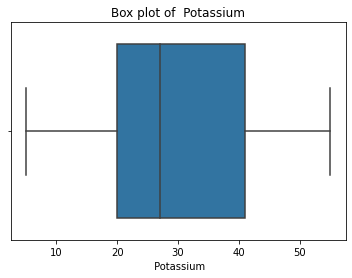

In [105]:
sns.boxplot(df2["K"])
plt.title("Box plot of  Potassium")
plt.xlabel(" Potassium")

In [106]:
df2.shape

(1632, 8)

# 2.e) Outliers in humidity column

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'humidity')

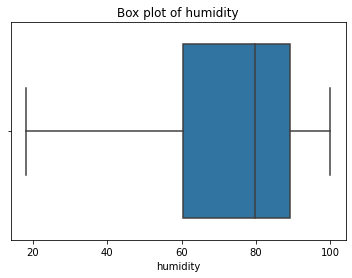

In [139]:
sns.boxplot(df2["humidity"])
plt.title("Box plot of humidity")
plt.xlabel("humidity")

No outliers in humidity data

In [110]:
df2.shape

(1632, 8)

# 2.f) Outliers in rainfall column

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'rainfall')

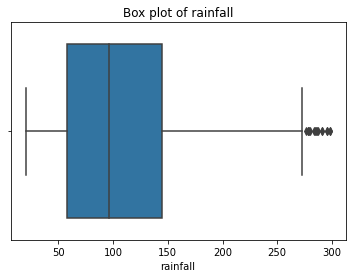

In [140]:
sns.boxplot(df2["rainfall"])
plt.title("Box plot of rainfall")
plt.xlabel("rainfall")

In [141]:
Q1=df2.rainfall.quantile(.25)
Q3=df2.rainfall.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.rainfall>Lower_Limit)&(df2.rainfall<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  86.7980894825
 
Upper limit of normal value is 274.75004444875003
Lower limit of normal value is -72.44231348125
Shape of outlier eliminated data is (1714, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'rainfall')

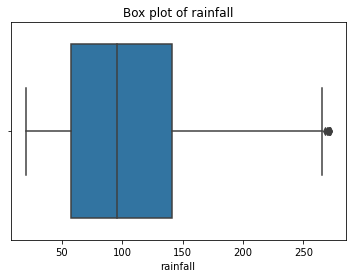

In [142]:
sns.boxplot(df2["rainfall"])
plt.title("Box plot of rainfall")
plt.xlabel("rainfall")

In [143]:
Q1=df2.rainfall.quantile(.25)
Q3=df2.rainfall.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.rainfall>Lower_Limit)&(df2.rainfall<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  84.04506452250001
 
Upper limit of normal value is 267.64264203375
Lower limit of normal value is -68.53761605625002
Shape of outlier eliminated data is (1707, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'rainfall')

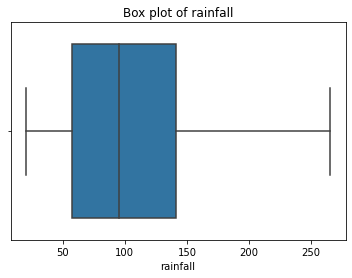

In [144]:
sns.boxplot(df2["rainfall"])
plt.title("Box plot of rainfall")
plt.xlabel("rainfall")

No outliers in rainfall column

# 2.f) Outliers in ph column

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'ph')

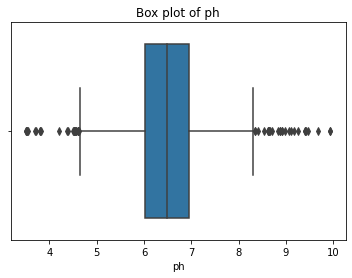

In [145]:
sns.boxplot(df2["ph"])
plt.title("Box plot of ph")
plt.xlabel("ph")

In [146]:
Q1=df2.ph.quantile(.25)
Q3=df2.ph.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.ph>Lower_Limit)&(df2.ph<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  0.9195447664999996
 
Upper limit of normal value is 8.328246339249999
Lower limit of normal value is 4.65006727325
Shape of outlier eliminated data is (1653, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'ph')

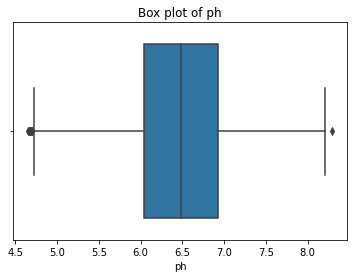

In [147]:
sns.boxplot(df2["ph"])
plt.title("Box plot of ph")
plt.xlabel("ph")

In [148]:
Q1=df2.ph.quantile(.25)
Q3=df2.ph.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.ph>Lower_Limit)&(df2.ph<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  0.8848806209999989
 
Upper limit of normal value is 8.259245894499998
Lower limit of normal value is 4.719723410500002
Shape of outlier eliminated data is (1643, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'ph')

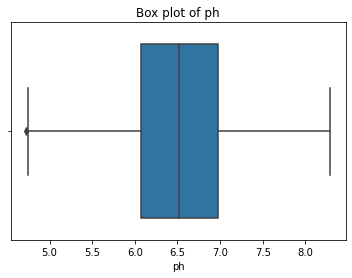

In [40]:
sns.boxplot(df2["ph"])
plt.title("Box plot of ph")
plt.xlabel("ph")

In [149]:
Q1=df2.ph.quantile(.25)
Q3=df2.ph.quantile(.75) # instead of copying from describe column we can run a code to find Q1 and Q3
IQR= Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_Limit=Q1-1.5*IQR
print ("IQR is ", IQR)
print(" \nUpper limit of normal value is",Upper_limit)
print("Lower limit of normal value is",Lower_Limit)
df2= df2[(df2.ph>Lower_Limit)&(df2.ph<Upper_limit)]
print("Shape of outlier eliminated data is",df2.shape)

IQR is  0.8702738185000003
 
Upper limit of normal value is 8.23778676825
Lower limit of normal value is 4.756691494249999
Shape of outlier eliminated data is (1637, 8)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'ph')

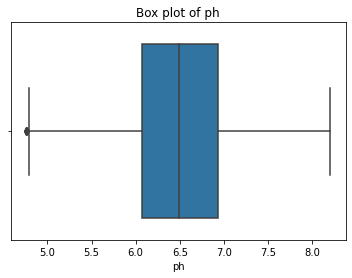

In [150]:
sns.boxplot(df2["ph"])
plt.title("Box plot of ph")
plt.xlabel("ph")

No outliers in rainfall column

In [151]:
df2.shape

(1637, 8)

In [154]:
df2

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [155]:
#checking for unique values
for i in df2.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(df2[i].nunique()))
    if(df2[i].dtype == 'object'):
        print('Unique values : ',pd.unique(df2[i]))

column Name :  N
No. of unique values : 136 

column Name :  P
No. of unique values : 73 

column Name :  K
No. of unique values : 51 

column Name :  TEMPERATURE
No. of unique values : 1637 

column Name :  HUMIDITY
No. of unique values : 1637 

column Name :  PH
No. of unique values : 1637 

column Name :  RAINFALL
No. of unique values : 1637 

column Name :  LABEL
No. of unique values : 19 

Unique values :  ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'watermelon'
 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


# 3 ) Encoding of label data

In [156]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
df2['Encoded_label'] = encod.fit_transform(df2.label) #label will be encoded in alphabetical order

In [157]:
df2

,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,17
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,17
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,17
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,17
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,17
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,3
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,3
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,3


Variable : N


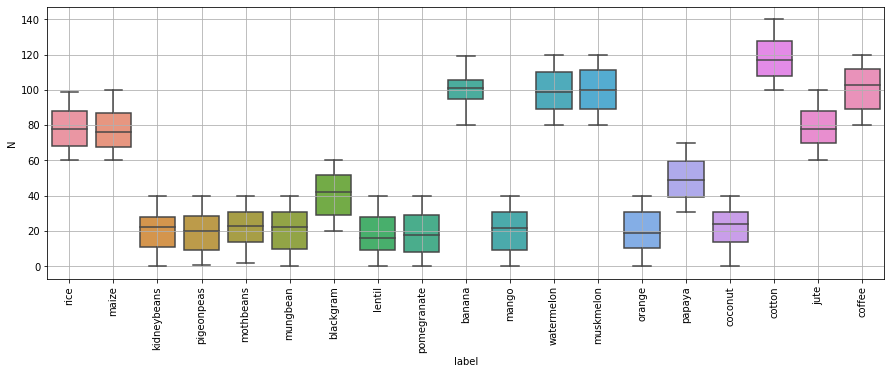

Variable : P


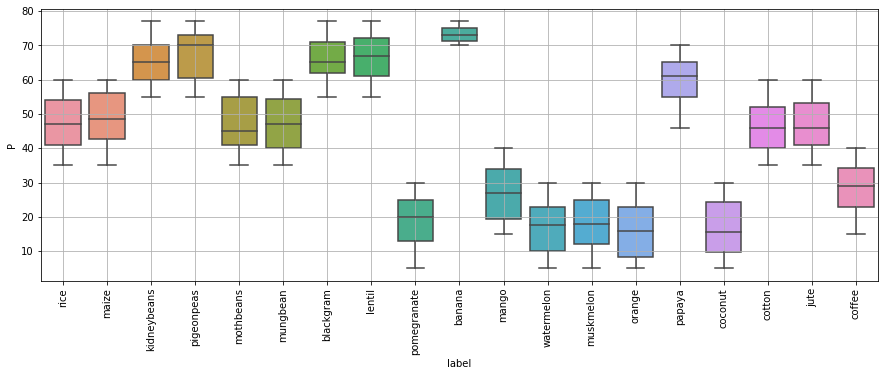

Variable : K


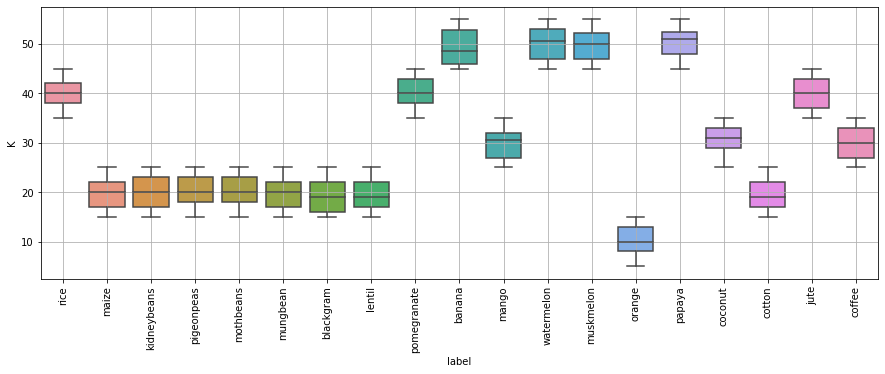

Variable : TEMPERATURE


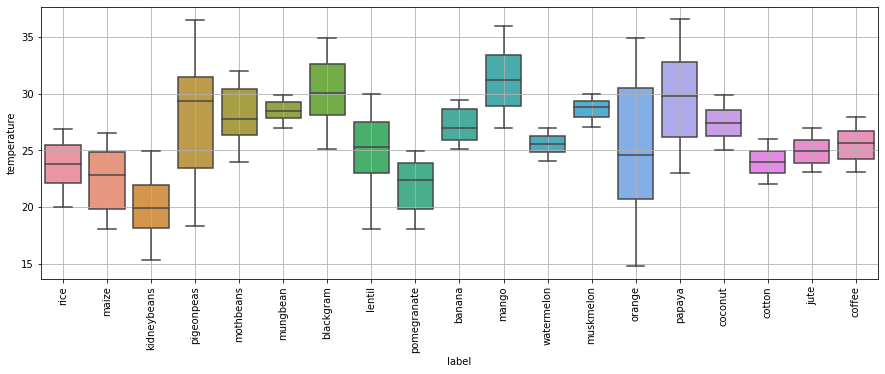

Variable : HUMIDITY


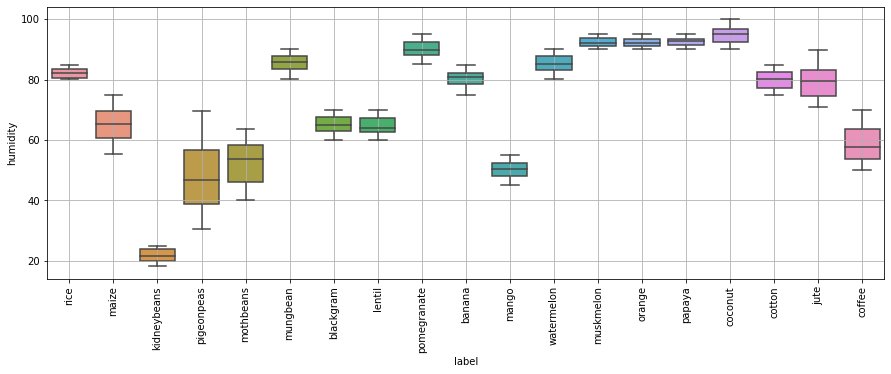

Variable : PH


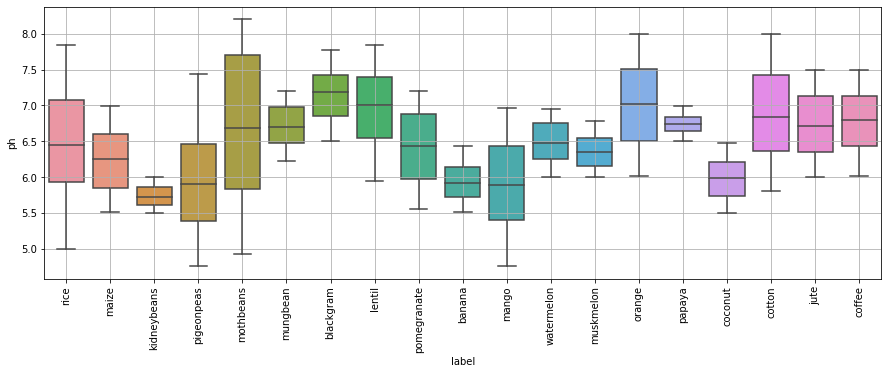

Variable : RAINFALL


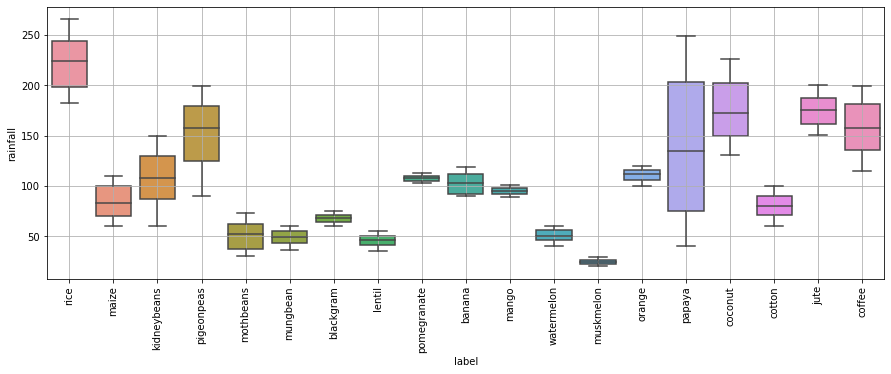

In [158]:
#plotting effect of input variable with output variable
for i in df2.columns[:-2]:
    plt.figure(figsize=(15,5))
    print('Variable :',i.upper())
    sns.boxplot(x=df2.label,y=df2[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:>

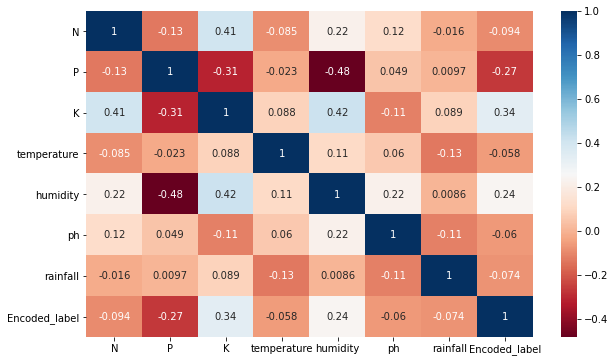

In [159]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True,cmap='RdBu')

# 4 a) Model Building using logical Regression

In [166]:
#Splitting the data into input and output
X = df2.iloc[:,:-2]
y = df2.Encoded_label

In [167]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [178]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [170]:
# Create logical regression model
from sklearn.linear_model import LogisticRegression # import logical regression from skl library and create the model
logit_model = LogisticRegression()          # to create an instance of the model
logit_model.fit(X_train, y_train) # to fit the regression model
y_prediction= logit_model.predict(X_test) # to predict y value


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
#Printing the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is ",accuracy_score(y_test, y_prediction))


Accuracy is  0.9451219512195121


In [176]:
confusion_matrix(y_test, y_prediction)

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  3,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  1,  1,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  9,  0,  0,  0,  0,  0

# 4) Model Building using Random Forest

In [179]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(X,y,random_state=2,test_size=.3)

In [180]:
np.shape(X_train)

(1145, 7)

In [181]:
np.shape(y_train)

(1145,)

In [182]:
#Using Random Forest
rf= RandomForestClassifier() 
rf.fit(X_train,y_train)

RandomForestClassifier()

In [183]:
y_pred= rf.predict(X_test)

In [184]:
# calculate the accuracy score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score,f1_score
print("Accuracy is ",accuracy_score(y_test, y_pred))

Accuracy is  0.9898373983739838


# 4 c) Model Building using KNN

In [186]:
#using KNN
acc_value=[]
neighbors=np.arange(3,15) 

for k in neighbors: 
    classifier= KNeighborsClassifier(n_neighbors=k,metric="minkowski") 
    classifier.fit(X_train,y_train) 
    y_pred=classifier.predict(X_test) 
    acc=accuracy_score(y_test, y_pred) 
    acc_value.append(acc)  

Text(0, 0.5, 'Accuracy')

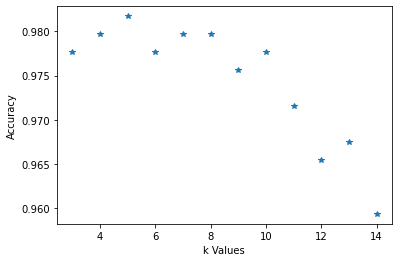

In [192]:
plt.plot(neighbors,acc_value , "*")
plt.xlabel("k Values")
plt.ylabel("Accuracy")

In [194]:
classifier= KNeighborsClassifier(n_neighbors=5,metric="minkowski")
classifier.fit(X_train,y_train) 
y_pred=classifier.predict(X_test) 
print("Accuracy is ",accuracy_score(y_test, y_pred))

Accuracy is  0.9817073170731707


# Step 5) Fine tuning of hyper parameter

In [196]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [197]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10, random_state=42,criterion="entropy")

In [198]:
rft.fit(X_train,y_train) # Training the model with new hyper parameters

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [199]:
y_pred=rft.predict(X_test) # Predicitng new value with changed hyper parameter . instead of rf we use rft(chnged parameter)

In [200]:
print("Accuracy is ",accuracy_score(y_test, y_pred))

Accuracy is  0.9939024390243902


After fine tuning of hyperparameter accuracy of the model is increased